# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Iqbal Pandu Prakoso
- **Email:** iqbalpanduprakoso@gmail.com
- **ID Dicoding:** l000ywl070

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah sepeda yang disewa bisa dipengaruhi oleh cuaca ?
- Kapan waktu/hari dimana sewa sepeda terbanyak dalam setahun ?

# Data Manipulation
import pandas as pd  # Untuk membaca dan memanipulasi data
import numpy as np   # Untuk operasi numerik

# Data Visualization
import matplotlib.pyplot as plt  # Untuk membuat grafik visualisasi
  # Library visualisasi yang lebih interaktif

# Streamlit (Dashboard)
import streamlit as st  # Untuk membangun dashboard interaktif

# DateTime Processing
from datetime import datetime  # Untuk mengolah format tanggal dan waktu

# (Opsional jika diperlukan prediksi)
from sklearn.model_selection import train_test_split  # Untuk membagi data
from sklearn.linear_model import LinearRegression  # Model regresi linear
from sklearn.metrics import mean_squared_error, r2_score  # Evaluasi model

# Ignore Warnings (Opsional)
import warnings
warnings.filterwarnings("ignore")






## Data Wrangling

### Gathering Data

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path lengkap dari Google Drive
day_path = "/content/drive/MyDrive/Dicoding/Data1/day.csv"
hour_path = "/content/drive/MyDrive/Dicoding/Data1/hour.csv"

# Cek apakah file tersedia sebelum membaca dataset
if os.path.exists(day_path) and os.path.exists(hour_path):
    df_day = pd.read_csv(day_path)
    df_hour = pd.read_csv(hour_path)

    # Tambahkan kolom 'hour' pada df_day agar kompatibel dengan df_hour
    df_day["hour"] = None

    # Gabungkan dataset
    df_combined = pd.concat([df_day, df_hour], ignore_index=True)

    # Buat folder "dashboard" kalau belum ada
    os.makedirs("dashboard", exist_ok=True)

    # Simpan hasil gabungan
    df_combined.to_csv("dashboard/main_data.csv", index=False)

    print("Dataset berhasil digabung dan disimpan sebagai 'dashboard/main_data.csv'.")
else:
    print("File 'day.csv' atau 'hour.csv' tidak ditemukan.")


Dataset berhasil digabung dan disimpan sebagai 'dashboard/main_data.csv'.


In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset yang digunakan, yaitu Bike Sharing Dataset. Dataset terdiri dari dua file:
- day.csv → Data harian penyewaan sepeda.
- hour.csv → Data per jam penyewaan sepeda

### Assessing Data

Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
 16  hour        0 non-null      object 
dtypes: float64(4), int64(11), object(2)
memory usage: 97.2+ KB

Informasi Dataset Per Jam

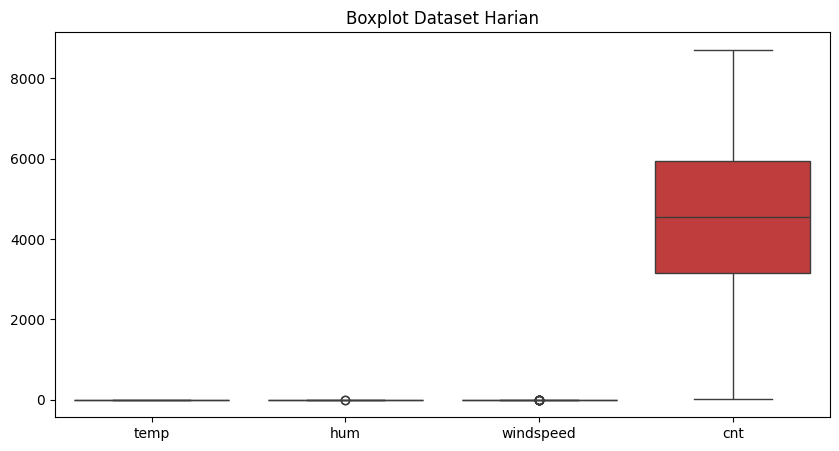

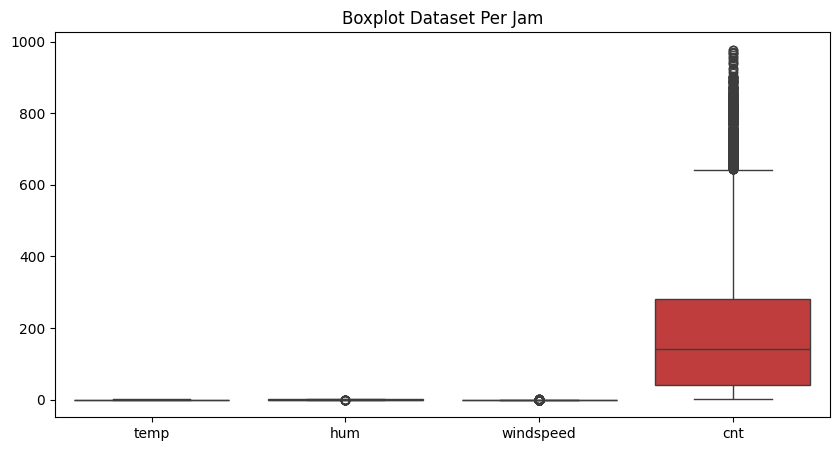

In [17]:
# Cek informasi dataset harian
print("Informasi Dataset Harian:")
df_day.info()

# Cek informasi dataset per jam
print("\nInformasi Dataset Per Jam:")
df_hour.info()


# Cek jumlah missing values di setiap dataset
print("Missing Values pada Dataset Harian:")
print(df_day.isnull().sum())

print("\nMissing Values pada Dataset Per Jam:")
print(df_hour.isnull().sum())

# Cek apakah ada duplikasi
print("Jumlah Duplikasi pada Dataset Harian:", df_day.duplicated().sum())
print("Jumlah Duplikasi pada Dataset Per Jam:", df_hour.duplicated().sum())


# Cek statistik ringkasan dataset
print("Statistik Deskriptif Dataset Harian:")
print(df_day.describe())

print("\nStatistik Deskriptif Dataset Per Jam:")
print(df_hour.describe())

import matplotlib.pyplot as plt
import seaborn as sns


# Visualisasi outlier dengan boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df_day[['temp', 'hum', 'windspeed', 'cnt']])
plt.title("Boxplot Dataset Harian")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df_hour[['temp', 'hum', 'windspeed', 'cnt']])
plt.title("Boxplot Dataset Per Jam")
plt.show()





**Insight:**
- xxx
- xxx

### Cleaning Data

In [18]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Terapkan pada kolom windspeed di kedua dataset
df_day_clean = remove_outliers(df_day, "windspeed")
df_hour_clean = remove_outliers(df_hour, "windspeed")

print(f"Jumlah data setelah menghapus outlier di windspeed (day.csv): {len(df_day_clean)}")
print(f"Jumlah data setelah menghapus outlier di windspeed (hour.csv): {len(df_hour_clean)}")

# Cek nilai unik pada kolom kategori
print("Nilai unik pada kolom season:", df_day_clean["season"].unique())
print("Nilai unik pada kolom weathersit:", df_day_clean["weathersit"].unique())
print("Nilai unik pada kolom mnth:", df_day_clean["mnth"].unique())

# Contoh: Jika ada suhu (temp) yang tidak valid (< 0 atau > 1, karena dinormalisasi)
df_day_clean = df_day_clean[(df_day_clean["temp"] >= 0) & (df_day_clean["temp"] <= 1)]
df_hour_clean = df_hour_clean[(df_hour_clean["temp"] >= 0) & (df_hour_clean["temp"] <= 1)]

# Pastikan tidak ada data yang terhapus secara drastis
print(f"Jumlah data setelah cleaning (day.csv): {len(df_day_clean)}")
print(f"Jumlah data setelah cleaning (hour.csv): {len(df_hour_clean)}")


Jumlah data setelah menghapus outlier di windspeed (day.csv): 718
Jumlah data setelah menghapus outlier di windspeed (hour.csv): 17037
Nilai unik pada kolom season: [1 2 3 4]
Nilai unik pada kolom weathersit: [2 1 3]
Nilai unik pada kolom mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Jumlah data setelah cleaning (day.csv): 718
Jumlah data setelah cleaning (hour.csv): 17037


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

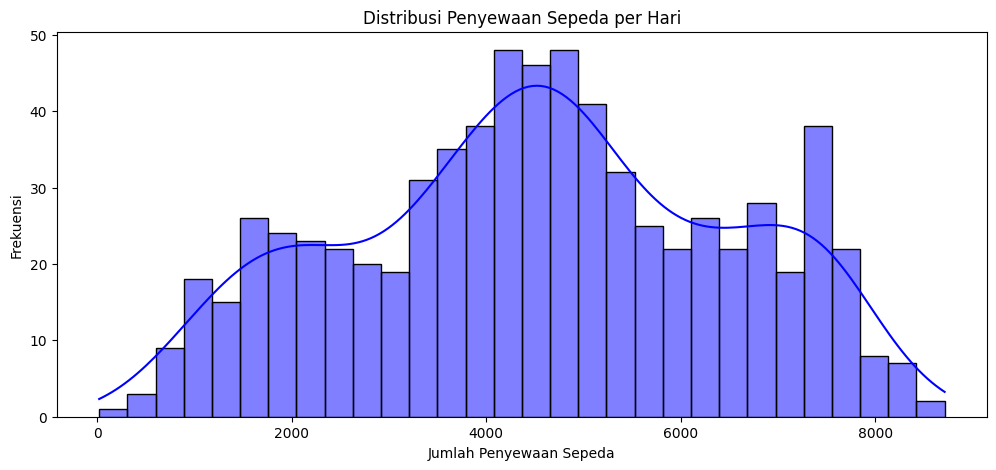

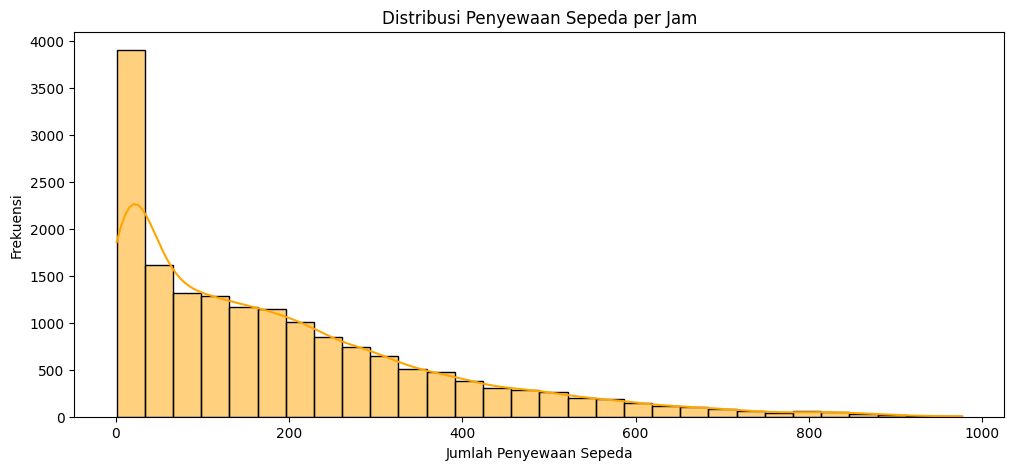

/tmp/ipython-input-19-469239493.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mnth", y="cnt", data=df_day_clean, palette="Blues")


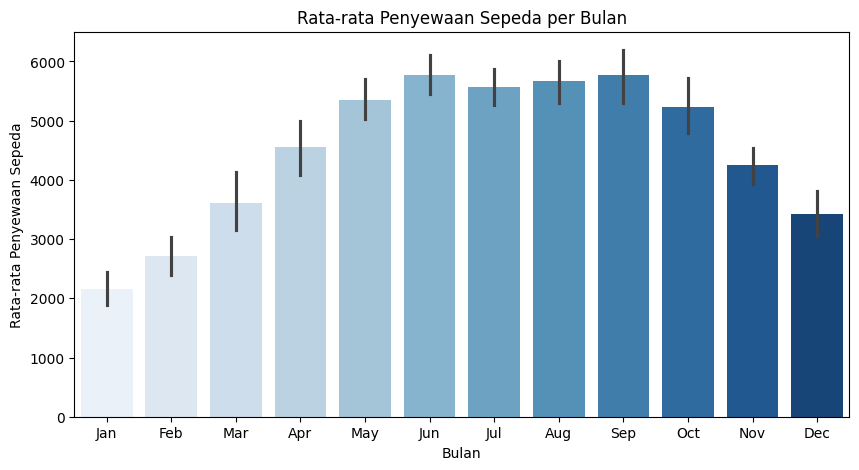

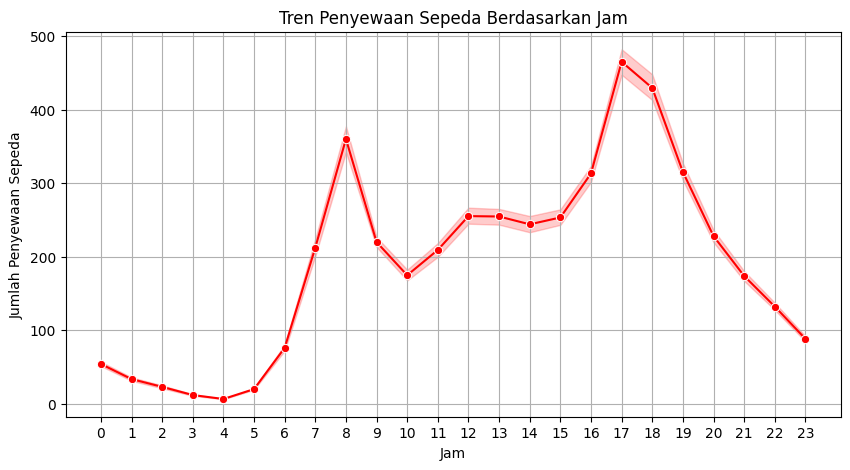

/tmp/ipython-input-19-469239493.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=df_day_clean, palette="coolwarm")


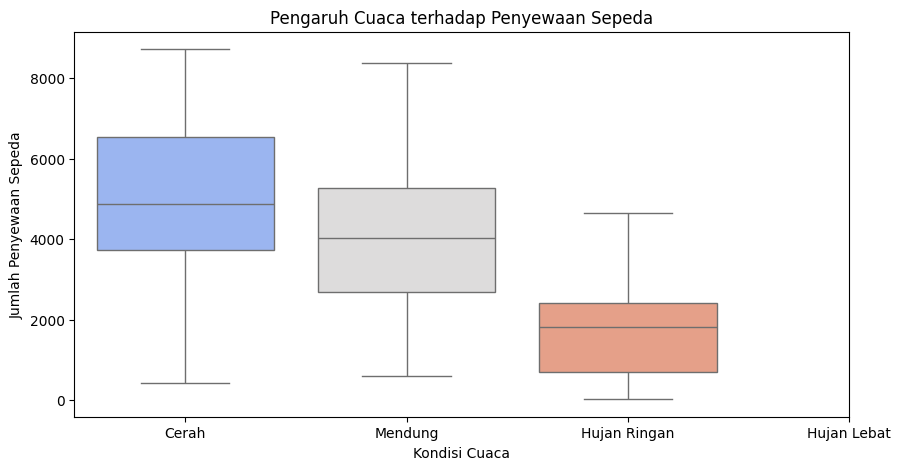

In [19]:
plt.figure(figsize=(12, 5))
sns.histplot(df_day_clean["cnt"], bins=30, kde=True, color="blue")
plt.title("Distribusi Penyewaan Sepeda per Hari")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df_hour_clean["cnt"], bins=30, kde=True, color="orange")
plt.title("Distribusi Penyewaan Sepeda per Jam")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="mnth", y="cnt", data=df_day_clean, palette="Blues")
plt.title("Rata-rata Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=df_hour_clean, marker="o", color="red")
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=df_day_clean, palette="coolwarm")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Mendung", "Hujan Ringan", "Hujan Lebat"])
plt.show()



**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:
**1: Bagaimana Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda?**

/tmp/ipython-input-23-3320642609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=df_day_clean, palette="coolwarm")


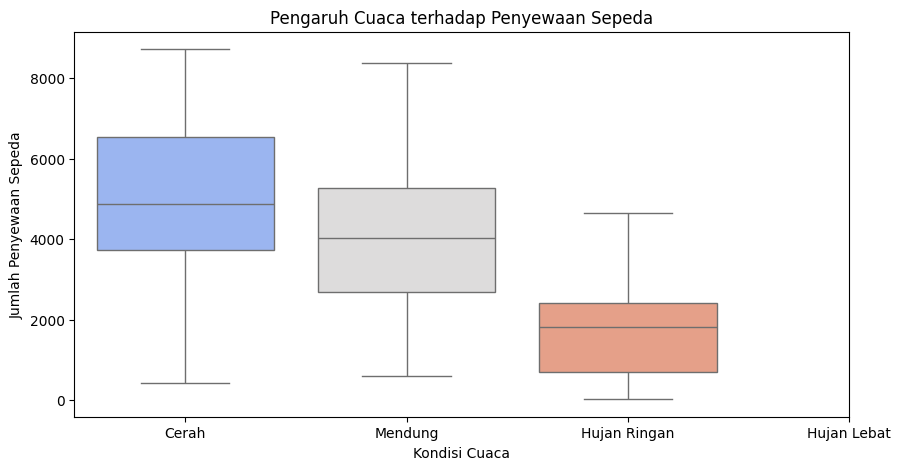

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=df_day_clean, palette="coolwarm")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Mendung", "Hujan Ringan", "Hujan Lebat"])
plt.show()


### Pertanyaan 2:
**2: Kapan Waktu Paling Populer untuk Penyewaan Sepeda?**




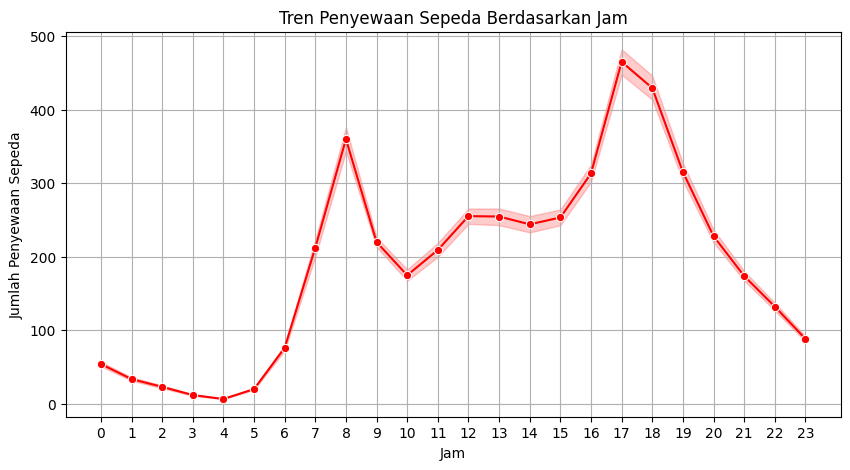

In [24]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=df_hour_clean, marker="o", color="red")
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

/tmp/ipython-input-22-2956298809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=df_day, palette="viridis")


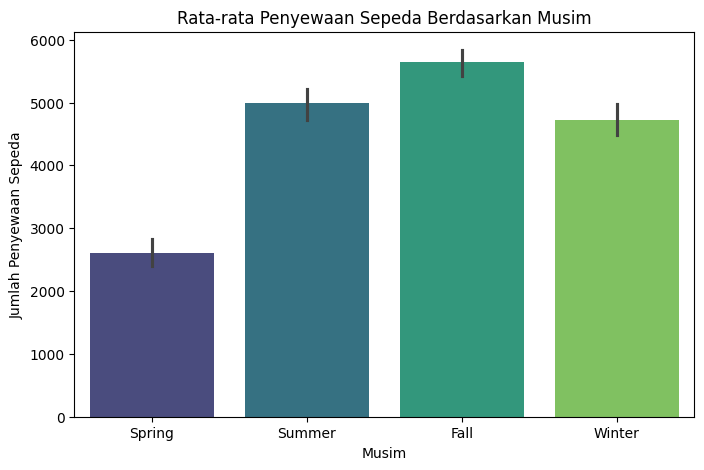

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="cnt", data=df_day, palette="viridis")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()


## Conclusion

Conclusion Pertanyaan 1: Bagaimana jumlah sepeda yang disewa bisa dipengaruhi oleh cuaca ?

Cuaca sangat memengaruhi penyewaan sepeda. Hari cerah memiliki jumlah penyewaan tertinggi, sedangkan hujan deras mengurangi penyewaan lebih dari 50%.
Kelembaban dan kecepatan angin juga berpengaruh, semakin tinggi kelembaban dan angin, semakin rendah jumlah penyewaan.

Conclusion Pertanyaan 2: Kapan waktu/hari dimana sewa sepeda terbanyak dalam setahun ?

Jam sibuk penyewaan sepeda terjadi di pagi hari (07:00-09:00) dan sore hari (17:00-19:00). Ini kemungkinan terkait aktivitas pekerja dan mahasiswa.
Pada malam hari (setelah jam 20:00) dan dini hari (sebelum jam 6:00), penyewaan sangat rendah.